## Introdução

Este material é uma tradução do Tutorial preparado por Colin Bernet que pode ser acessado [aqui ](https://thedatafrog.com/handwritten-digit-recognition-scikit-learn/)

## Sobre este tutorial

Este tutorial é uma introdução prática ao aprendizado de máquina para iniciantes.

A introdução ao aprendizado de máquina pode ser bastante difícil quando você procura aleatoriamente informações na web.

Aqui, meu objetivo é ajudá-lo com um exemplo concreto de reconhecimento de imagem, com apenas um pouco de código e sem matemática.

Após uma breve introdução ao aprendizado de máquina, você aprenderá:

* os princípios do aprendizado de máquina supervisionado para classificação,
* como instalar todo o pacote científico do python,
* como acessar e validar os dados de treinamento para sua rede,
* como criar e treinar sua rede
* como usar o treinado e testar seu desempenho.

#### Pré-requisitos

Trabalharemos em python, que é uma escolha maravilhosa para a ciência de dados. Se você não é um desenvolvedor python, mas conhece um pouco de C, C ++ ou Java, por exemplo, ficará bem. Essa será uma excelente ocasião para descobrir python. E, quem sabe, você também pode se apaixonar por essa linguagem!

## Por que aprendizado de máquina?

O aprendizado de máquina é um campo de inteligência artificial no qual um sistema é projetado para aprender automaticamente, considerando um conjunto de dados de entrada. Após o aprendizado do sistema (dizemos que o sistema foi treinado), podemos usá-lo para fazer previsões de novos dados, antes nunca vistos.

Essa abordagem torna possível solucionar problemas complexos difíceis ou impossíveis de resolver com a programação seqüencial tradicional.

Exemplos de aplicativos de aprendizado de máquina incluem:

* carros autônomos: dados os dados de sensores como câmeras e radares, o carro é treinado para dirigir por conta própria.

[O site do google ainda precisa aprender sobre a faixa da direita] (https://www.youtube.com/watch?v=TsaES--OTzM) ;-)
* drones: o piloto do drone só precisa dar instruções simples (para cima, baixo, esquerda, direita ou apenas coordenadas 3D), e o drone executa automaticamente ajustes complexos para manter a estabilidade ou para voar em formação (https: // www.youtube.com/watch?v=VnTQTm7vNbY)
* [robôs](https://www.youtube.com/watch?v=LikxFZZO2sk)
* previsão do preço do imóvel a partir de um conjunto de variáveis ​​como localização, número de quartos e até o texto do anúncio imobiliário. Certamente farei um tutorial sobre isso em um futuro próximo.
* anúncios do Google que prevêem a probabilidade de você estar interessado em um determinado anúncio para enviar os mais promissores
* sistemas de recomendação colaborativa que oferecem os vídeos do youtube ou os produtos da amazon que você vai gostar
* identificação de defeitos nas cadeias de produção
* identificação de grupos de pessoas afins nas redes sociais e dos influenciadores mais importantes dentro desses grupos
* marcar fotos (basta digitar gato ou comida na caixa de pesquisa da sua biblioteca de fotos do Google, se você tiver uma)
* sistemas de tradução como o [google translate](https://translate.google.fr/?hl=en)

* filtragem de spam e-mail
* gerar pinturas automaticamente:[sonho profundo](https://deepdreamgenerator.com/#gallery), [doodle neural](https://github.com/alexjc/neural-doodle)
* ...


## Aprendizado de máquina para classificação

Vamos entender como uma rede neural pode ser treinada para classificação.

Neste post, nosso objetivo é começar o aprendizado de máquina de maneira rápida e fácil, por isso, só vou lhe dar uma explicação simplificada por enquanto. Haverá um post mais detalhado sobre os princípios de treinamento posteriormente, portanto, fique atento se estiver interessado.

! [Aprendizado supervisionado] (https://github.com/cbernet/maldives/raw/master/handwritten_digits_sklearn/supervised_learning.png)

A rede é apresentada com uma sucessão de exemplos de treinamento. Cada exemplo de treinamento consiste em:

* a imagem de um dígito
* um rótulo que indica qual dígito a imagem realmente representa. Para uma determinada imagem, o rótulo poderia ser informado pela pessoa que escreveu o dígito em primeiro lugar.

No desenho acima, a primeira imagem é processada pela rede neural, que produz uma resposta: este é um 9.

A princípio, as conexões entre os neurônios da rede são aleatórias e a rede não pode fazer nada de útil. Apenas fornece uma resposta aleatória.

A resposta é comparada ao rótulo. Nesse caso, a resposta (9) é diferente da etiqueta (o dígito é na verdade um 3), e algum feedback é dado à rede neural para que ela possa melhorar. As conexões entre os neurônios são modificadas, favorecendo as que tendem a dar uma resposta correta.

Após a modificação, os próximos exemplos são considerados e a rede neural aprende em um processo iterativo.

O número de exemplos de treinamento necessários para treinar a rede corretamente pode ser da ordem de algumas centenas para redes com uma arquitetura simples e milhões para redes complexas.

## Instalando python e sua biblioteca científica

** Se você já está executando este tutorial em seu notebook jupyter, pule esta seção. **

Usaremos uma variedade de ferramentas da [scipy](https://www.scipy.org/), a biblioteca científica python:

* [scikit-learn](https://scikit-learn.org/): um dos principais kits de ferramentas de aprendizado de máquina para python. Ele fornecerá um acesso fácil ao conjunto de dados de dígitos manuscritos e nos permitirá definir e treinar nossa rede neural em algumas linhas de código
* [numpy](http://www.numpy.org/): pacote principal que fornece ferramentas poderosas para manipular matrizes de dados, como nossas imagens de dígitos
* [matplotlib](https://matplotlib.org/): ferramentas de visualização, essenciais para verificar o que estamos fazendo
* [jupyter](https://jupyter.org/): o servidor da web que permitirá que você siga este tutorial e execute o código diretamente no seu navegador.

O Scipy, na verdade, não é uma biblioteca única, mas um "ecossistema" de pacotes python interdependentes.

Esse ecossistema está cheio de cobras e bestas que lutam pela sobrevivência - você não quer ficar lá sozinho.

E, de fato, seis anos atrás, quando eu comecei com o scipy, tentei instalar manualmente todos os pacotes necessários na parte superior da versão do python já instalada no meu sistema.

Passei quase um dia lutando contra dependências conflitantes para esses pacotes. Por exemplo, o scikit-learn pode precisar da versão numpy A, mas o pandas precisa da versão B numpy. Ou um desses pacotes requer uma versão do python mais recente que a sua, o que significa que você precisa instalar uma versão adicional do python e lide com suas duas versões mais tarde.

E então, eu descobri o [Anaconda] (https://anaconda.org/).

Conforme declarado no site da Anaconda:

* Com mais de 6 milhões de usuários, o Anaconda Distribution de código aberto é a maneira mais rápida e fácil de fazer ciência de dados em Python e R e aprendizado de máquina no Linux, Windows e Mac OS X. É o padrão do setor para desenvolvimento, teste e treinamento em uma única máquina. *

Em poucas palavras, a equipe do anaconda mantém um repositório de mais de 1400 pacotes de ciência de dados, todos compatíveis, e fornece ferramentas para instalar uma versão do python e esses pacotes com o pressionar de um botão e menos de cinco minutos.

Vamos fazer agora!

Primeiro, [faça o download do anaconda] (https://www.anaconda.com/download/) para o seu sistema:

* Escolha a versão python 2.X, não a versão 3.X.
* Se você estiver usando o Windows ou Linux, escolha o instalador de 64 bits se tiver um sistema de 64 bits.

Execute o instalador e, finalmente, inicie o Anaconda Navigator. No Windows, você pode encontrá-lo clicando no botão Iniciar do Windows e digitando anaconda.

Na janela Anaconda Navigator, clique na guia Início e inicie o notebook jupyter.

Crie um novo notebook. No seu notebook, você verá uma célula vazia, onde é possível escrever código python. Copie e cole as seguintes linhas e execute a célula pressionando Shift + Enter.

```python
print 'hello world!'
for i in range(10):
    print i
```

Uma nova célula aparece. Importe numpy e matplotlib (lembre-se de que você precisa executar a célula):

```python
import matplotlib.pyplot as plt 
import numpy as np 
```

Esta é uma maneira padrão de importar estes módulos:

* o módulo pyplot do matplotlib é chamado plt neste contexto
* o módulo numpy é chamado np

Você pode muito bem escolher outros nomes, mas esses são usados por quase todo mundo, por isso é mais fácil usá-los também.

Agora vamos tentar fazer nosso primeiro gráfico, apenas para garantir que numpy e matplotlib estejam funcionando:

```python 
# create a numpy 1-D array with 16 evenly spaced values, from 0 to 3.
x = np.linspace(0, 3, 16)
print x 
# create a new numpy array. 
# x**2 means that each element of x is squared.
y = x**2
print y
# plot y versus x, you should get a parabola. 
# check that for x = 1 we have y = 1, and that for x = 2, y = 4. 
plt.plot(x, y)
```

--- 

💡 **Uma palavra de cautela:**

É muito fácil se perder na documentação de todas essas ferramentas e perder muito tempo.

Por exemplo, se você verificar a documentação do método plt.plot (não fornecerei o link ;-) mas você pode pesquisá-lo no Google), verá que existem várias maneiras de chamá-lo, com muitos parâmetros opcionais . Mas, afinal, precisamos saber mais do que isso: `plt.plot (x, y)` plota y vs x?

Se você quiser se divertir, sugiro seguir este tutorial até o final sem ir mais fundo.

Você treinará sua primeira rede neural com facilidade e, no processo, terá uma compreensão das ferramentas mais importantes para aprender scikit, numpy e matplotlib. Isso é mais do que suficiente para uma variedade de tarefas de aprendizado de máquina, e você sempre pode aprender mais sobre os recursos específicos dessas ferramentas quando precisar delas mais tarde (você saberá!)

Para ir além, aqui está uma excelente [palestra sobre scipy](https://scipy-lectures.org/).
---

Agora que você tem acesso ao notebook jupyter, tenho boas notícias. Você não precisará manter o código de copiar e colar desta página no seu notebook.

Em vez disso, faça o seguinte:

* [faça o download do repositório que contém este caderno](https://github.com/cbernet/maldives/archive/master.zip)
* descompacte-o, diga `Downloads / maldives-master`
* inicie um notebook jupyter a partir do navegador anaconda
* no caderno, navegue até `Downloads / maldives-master / handwritten_digits_sklearn`
* abra `handwritten_digits_sklean.ipynb`

Você deve ver esta página aparecer no caderno. A partir de agora, siga o tutorial no caderno. Você deve executar as células como elas vêm, ou executá-las de uma só vez. Você pode até adicionar células ou modificar células existentes para experimentar um pouco.

## O conjunto de dados de dígitos

O scikit-learn vem com vários conjuntos de dados de teste. Vamos carregar o conjunto de dados de dígitos manuscritos:

In [1]:
from sklearn import datasets
digits = datasets.load_digits()

Em python, a função `dir` retorna os nomes dos atributos de um objeto, ou seja, quais informações são armazenadas no objeto na forma de outros objetos. Vamos usar esta função para verificar o que pode ser encontrado no objeto dígitos:

In [2]:
dir(digits)

['DESCR', 'data', 'images', 'target', 'target_names']

Vamos dar uma olhada em mais detalhes em alguns desses atributos. Vamos começar verificando o tipo deles:

In [4]:
print(type(digits.images))
print(type(digits.target))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


`images` e` target` são ndarrays (matrizes N-dimensionais) do pacote numpy. O atributo shape de um ndarray fornece o número de dimensões e o tamanho ao longo de cada dimensão da matriz. Por exemplo:

In [5]:
digits.images.shape

(1797, 8, 8)

digits.image é uma matriz com 3 dimensões. A primeira dimensão indexa imagens e vemos que temos 1797 imagens no total. As próximas duas dimensões correspondem às coordenadas xey dos pixels em cada imagem. Cada imagem tem 8x8 = 64 pixels. Em outras palavras, essa matriz pode ser representada em 3D como uma pilha de imagens com 8x8 pixels cada.

vejamos os dados da primeira imagem 8x8. Cada slot na matriz corresponde a um pixel, e o valor no slot é a quantidade de preto no pixel

In [7]:
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


Agora vamos exibir esta imagem: (às vezes, o gráfico não aparece, basta executar novamente esta célula se você não vir a imagem)

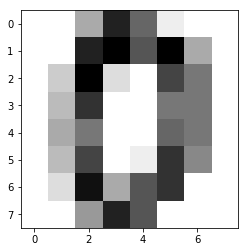

In [9]:
import matplotlib.pyplot as plt
plt.imshow(digits.images[0],cmap='binary')
plt.show()

A imagem é de baixa resolução. Os dígitos originais tinham uma resolução muito mais alta e a resolução foi diminuída ao criar o conjunto de dados para o scikit-learn para tornar mais fácil e rápido o treinamento de um algoritmo de aprendizado de máquina para reconhecer esses dígitos.

Agora vamos investigar o atributo target:

In [10]:
print(digits.target.shape)
print(digits.target)

(1797,)
[0 1 2 ... 8 9 8]


É uma matriz unidimensional com 1797 slots. Observando a matriz, vemos que ela contém os números verdadeiros correspondentes a cada imagem. Por exemplo, o primeiro alvo é 0 e corresponde à imagem desenhada logo acima.

Vamos dar uma olhada em mais algumas imagens usando esta função:

In [11]:
def plot_multi(i):
    '''Plota 16 dígitos, começando com o dígito i'''
    nplots = 16
    fig = plt.figure(figsize=(15,15))
    for j in range(nplots):
        plt.subplot(4,4,j+1)
        plt.imshow(digits.images[i+j], cmap='binary')
        plt.title(digits.target[i+j])
        plt.axis('off')
    plt.show()

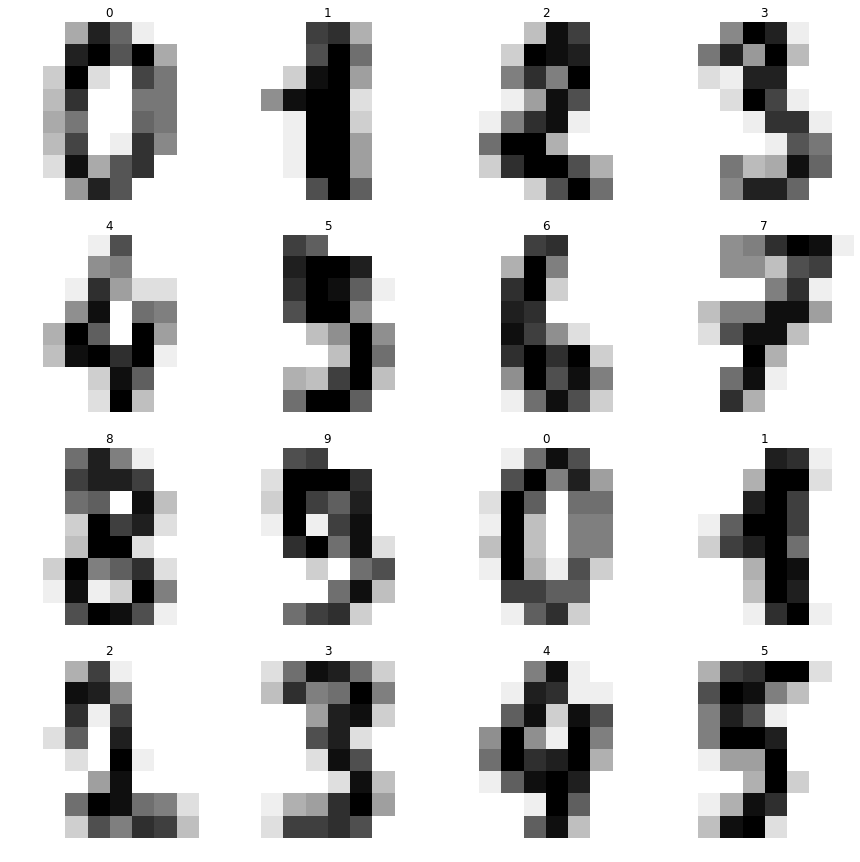

In [12]:
plot_multi(0)

você pode dar uma olhada nos próximos dígitos chamando plot_multi (16), plot_multi (32) etc. Você provavelmente verá que, com uma resolução tão baixa, é muito difícil reconhecer alguns dos dígitos, mesmo para humanos. Nessas condições, nossa rede neural também será limitada pela baixa qualidade das imagens de entrada. A rede neural pode ter um desempenho tão bom quanto o humano? Já seria uma conquista!

## Construindo a rede e preparando os dados de entrada

Com o [scikit-learn](https://scikit-learn.org), a criação, o treinamento e a avaliação de uma rede neural podem ser feitos com apenas algumas linhas de código.

Faremos uma rede neural muito simples, com três camadas:

* uma camada de entrada, com 64 nós, um nó por pixel nas imagens de entrada. Nós são neurônios que realmente não fazem nada. Eles apenas pegam seu valor de entrada e o enviam para os neurônios da próxima camada
* uma camada oculta com 15 neurônios. Poderíamos escolher um número diferente e também adicionar mais camadas ocultas com diferentes números de neurônios
* uma camada de saída com 10 neurônios correspondentes às nossas 10 classes de dígitos, de 0 a 9.

Essa é uma rede neural * densa *, o que significa que cada nó em cada camada está conectado a todos os nós nas camadas anterior e seguinte.


![Simple dense network](https://github.com/cbernet/maldives/raw/master/handwritten_digits_sklearn/simple_dense.png)

A camada de entrada requer uma matriz unidimensional na entrada, mas nossas imagens são 2D. Então, precisamos achatar todas as imagens:

In [13]:
y = digits.target
x = digits.images.reshape((len(digits.images), -1))
x.shape

(1797, 64)

Agora temos 1797 imagens achatadas. As duas dimensões de nossas imagens 8x8 foram recolhidas em uma única dimensão, escrevendo as linhas de 8 pixels conforme elas aparecem, uma após a outra. A primeira imagem que vimos anteriormente agora é representada por uma matriz 1-D com 8x8 = 64 slots. Verifique se os valores abaixo são os mesmos da imagem 2-D original.

In [14]:
x[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

agora vamos dividir nossos dados em uma amostra de treinamento e uma amostra de teste:

In [15]:
x_train = x[:1000]
y_train = y[:1000]
x_test = x[1000:]
y_test = y[1000:]

As primeiras 1000 imagens e rótulos serão usadas para treinamento. O restante do conjunto de dados será usado posteriormente para testar o desempenho da nossa rede.

Agora podemos criar a rede neural. Usamos uma camada oculta com 15 neurônios, e o scikit-learn é inteligente o suficiente para descobrir quantos números usar nas camadas de entrada e saída. Não preste atenção nos outros parâmetros, abordaremos isso em postagens futuras.

In [16]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(15,), activation='logistic', alpha=1e-4,
                    solver='sgd', tol=1e-4, random_state=1,
                    learning_rate_init=.1, verbose=True)


Finalmente, podemos treinar a rede neural:

In [17]:
mlp.fit(x_train,y_train)

Iteration 1, loss = 2.22958289
Iteration 2, loss = 1.91207743
Iteration 3, loss = 1.62507727
Iteration 4, loss = 1.32649842
Iteration 5, loss = 1.06100535
Iteration 6, loss = 0.83995513
Iteration 7, loss = 0.67806075
Iteration 8, loss = 0.55175832
Iteration 9, loss = 0.45840445
Iteration 10, loss = 0.39149735
Iteration 11, loss = 0.33676351
Iteration 12, loss = 0.29059880
Iteration 13, loss = 0.25437208
Iteration 14, loss = 0.22838372
Iteration 15, loss = 0.20200554
Iteration 16, loss = 0.18186565
Iteration 17, loss = 0.16461183
Iteration 18, loss = 0.14990228
Iteration 19, loss = 0.13892154
Iteration 20, loss = 0.12833784
Iteration 21, loss = 0.12138920
Iteration 22, loss = 0.11407971
Iteration 23, loss = 0.10677664
Iteration 24, loss = 0.10037149
Iteration 25, loss = 0.09593187
Iteration 26, loss = 0.09250135
Iteration 27, loss = 0.08676698
Iteration 28, loss = 0.08356043
Iteration 29, loss = 0.08209789
Iteration 30, loss = 0.07649168
Iteration 31, loss = 0.07410898
Iteration 32, los

MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(15,), learning_rate='constant',
       learning_rate_init=0.1, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='sgd', tol=0.0001,
       validation_fraction=0.1, verbose=True, warm_start=False)

O treinamento foi extremamente rápido, porque a rede neural é simples e o conjunto de dados de entrada é pequeno. Agora que a rede foi treinada, vejamos o que pode dizer sobre nossas imagens de teste:

In [18]:
predictions = mlp.predict(x_test)
predictions[:50] 
# apenas examinamos os 50 primeiros exemplos na amostra de teste

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 3, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 5, 0])

Essas previsões devem estar bastante próximas das metas de nossa amostra de treinamento. Vamos verificar a olho nu (compare os valores dessas matrizes)

In [19]:
y_test[:50] 
# etiquetas verdadeiras para os primeiros 50 exemplos na amostra de teste

array([1, 4, 0, 5, 3, 6, 9, 6, 1, 7, 5, 4, 4, 7, 2, 8, 2, 2, 5, 7, 9, 5,
       4, 4, 9, 0, 8, 9, 8, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4,
       5, 6, 7, 8, 9, 0])

Não é ruim! vemos que a maioria das previsões (se não todas) corresponde aos rótulos verdadeiros.

Mas podemos ser um pouco mais quantitativos? Podemos calcular a precisão do classificador, qual a probabilidade de um dígito ser classificado na categoria correta. Novamente, o scikit-learn vem com uma ferramenta útil para fazer isso:

In [20]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9146800501882058

Esse número é a probabilidade de os dígitos na amostra de teste serem classificados na categoria correta, o que significa que 91,6% dos dígitos estão corretos e 8,4% incorretos.

**Conseguimos obter uma precisão de 91,6% com esta rede neural muito simples. Não é tão ruim!**

No entanto, esta é apenas uma primeira tentativa.

Na verdade, devo confessar que optei por usar uma rede simplista para manter o desempenho baixo, para que possamos otimizá-lo mais tarde.

## Conclusão e perspectivas

Neste tutorial prático, você aprendeu:

* Os princípios do aprendizado de máquina supervisionado para classificação,
* Como instalar e usar o pacote python científico para aprendizado de máquina,
* Como investigar sobre seu conjunto de dados de entrada,
* Como treinar uma rede neural para reconhecimento de imagens, atingindo uma precisão maior que 90% na classificação de dígitos.

É só o começo! Em posts futuros, iremos:

* veja se podemos otimizar nossa rede para aumentar ainda mais a precisão,
* use aprendizado profundo (redes muito mais complexas) para alcançar precisão extrema,
* mergulhe um pouco mais no mecanismo do treinamento para entender por que criamos a rede neural com esses parâmetros.